<a href="https://colab.research.google.com/github/ritesh200tiwari/stock-market-price-prediction/blob/main/stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn import model_selection, preprocessing
color = sns.color_palette()
%matplotlib inline
# result transform
def num2log(arr):
    return np.log(arr + 1)
# result retransform
def log2num(arr):
    return np.exp(arr) - 1
# treat date
def trans_date(arr): 
    return datetime.datetime.strptime(arr, '%Y-%m-%d').date()
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split as split

from keras.layers import LSTM, Input, Dense
from keras.models import Model

from deap import base, creator, tools, algorithms
from scipy.stats import bernoulli
from bitstring import BitArray
import skfuzzy as fuzz

np.random.seed(1120)

In [ ]:
data = pd.read_csv("D://internship work//main work//stock prediction//NSE-TATAGLOBAL - Copy.csv")
# datat = pd.read_csv("D://internship work//main work//stock prediction//TATAtest.csv")
# datatlength =len(datat.index)
# data=data.append(datat, ignore_index = True)
data=data.dropna()

In [ ]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Volume
0,2018-08-13,233.00,236.45,232.25,235.20,234.55,1948583,4573.57
1,2018-08-10,237.30,237.95,231.10,233.65,233.55,2035594,4757.48
2,2018-08-09,236.65,239.85,235.30,237.25,237.30,1127248,2676.63
3,2018-08-08,237.25,240.50,235.05,236.35,236.35,1807313,4305.39
4,2018-08-07,241.00,241.55,235.30,237.50,237.60,1963538,4677.58


In [ ]:
data=data.dropna() 
data.describe()



,Open,High,Low,Last,Close,Total Trade Quantity,Volume
count,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2.005000e+03,2005.000000
mean,148.464564,150.722369,146.066858,148.228853,148.204888,2.324675e+06,3851.469456
std,47.927187,48.663053,47.210592,48.004391,47.983537,2.097053e+06,4567.210506
min,81.100000,82.800000,80.000000,81.000000,80.950000,3.961000e+04,37.040000
25%,120.000000,121.900000,118.000000,119.800000,119.900000,1.138811e+06,1417.660000
50%,141.000000,143.000000,139.050000,140.900000,140.900000,1.763657e+06,2463.480000
75%,156.750000,158.500000,154.200000,156.300000,156.350000,2.780284e+06,4403.010000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


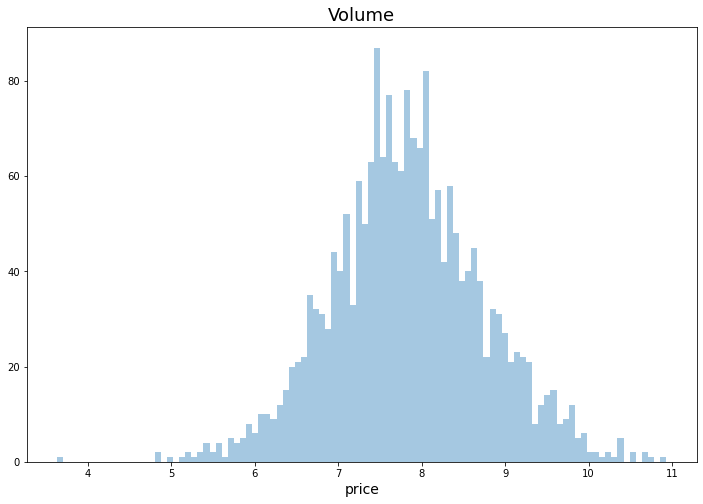

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(num2log(data['Volume'].values), bins=100, kde=False)
plt.xlabel('price', fontsize=14)
plt.title('Volume', fontsize = 18)
plt.show()

In [ ]:
# Feature Scaling
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range = (0, 1))
# data_scaled = sc.fit_transform(data)
# data_scaled

In [ ]:
# columns = ["Date", "Open", "High", "Low", "Last", "Close", "Total Trade Quantity","Turnover_Lacs"]

In [ ]:
# df = pd.DataFrame(data_scaled, columns = columns)

# df.head()

In [ ]:
    data['date'] = data['Date'].apply(trans_date)
    data['year'] = data.date.apply(lambda x: x.year)
    data['month_num'] = data.date.apply(lambda x: x.month + 12*(x.year-2010))
    data['month'] = data.date.apply(lambda x: x.month)
    start_date = data.date.min()
    data['diff_date'] = data['date'].apply(lambda x: (x - start_date).days)
    data['Volume'] = num2log(data.Volume.values)

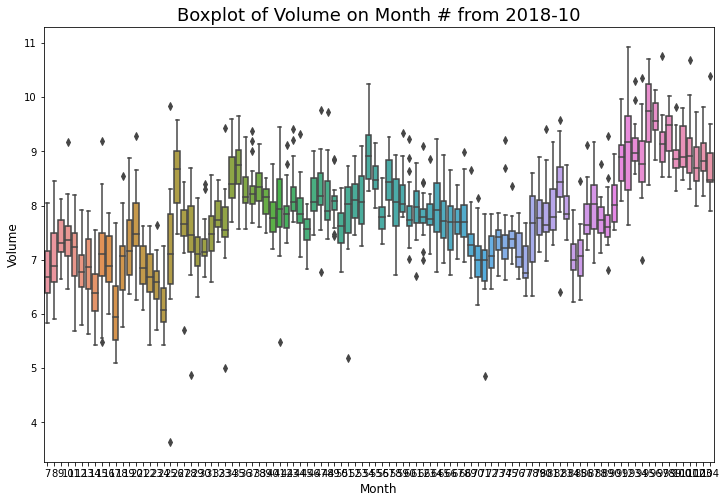

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


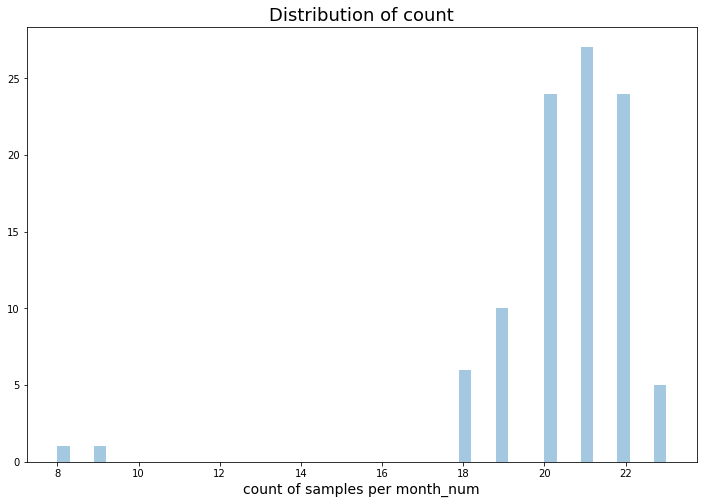

In [ ]:
    month_num_count = data.groupby('month_num').count().reset_index()
    month_num_count = data.groupby('month_num').size().reset_index()
    month_num_count.columns = ['month_num', 'Count']
    plt.figure(figsize=(12,8))
    sns.boxplot(x = 'month_num', y = 'Volume', data = data)
    plt.ylabel('Volume', fontsize=12)
    plt.xlabel('Month', fontsize=12)
    plt.title('Boxplot of Volume on Month # from 2018-10', fontsize = 18)
    plt.show()
    plt.figure(figsize=(12,8))
    sns.distplot(month_num_count.Count.values, bins=50, kde=False)
    plt.xlabel('count of samples per month_num', fontsize=14)
    plt.title('Distribution of count', fontsize = 18)
    plt.show()

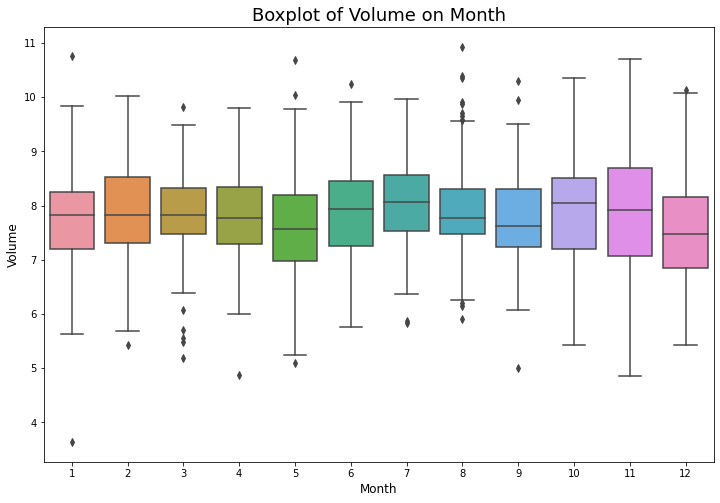

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'month', y = 'Volume', data = data)
plt.ylabel('Volume', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Boxplot of Volume on Month', fontsize = 18)
plt.show()

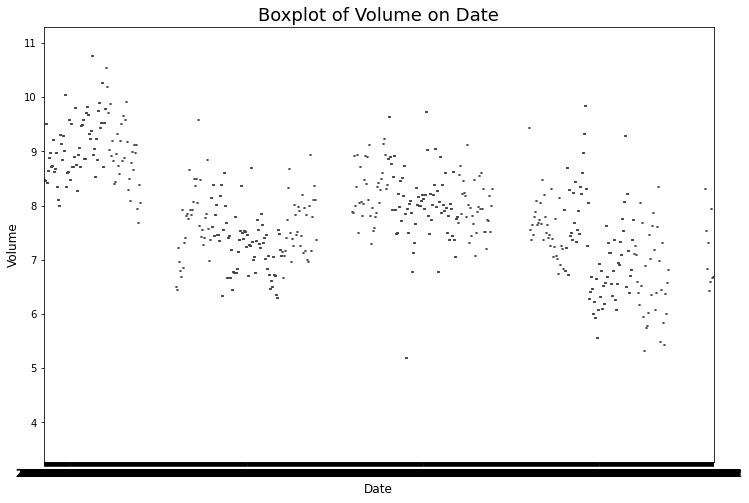

In [ ]:
date_count = data.groupby('date').count().reset_index()
date_count = data.groupby('date').size().reset_index()
date_count.columns = ['date', 'Count']
plt.figure(figsize=(12,8))
sns.boxplot(x = 'date', y = 'Volume', data = data)
plt.ylabel('Volume', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Boxplot of Volume on Date', fontsize = 18)
plt.show()



In [ ]:
# plt.figure(figsize=(12,8))
# sns.distplot(date_count.Count.values, bins=100, kde=False)
# plt.xlabel('count of samples per date', fontsize=14)
# plt.title('Distribution of count', fontsize = 18)
# plt.show()

In [ ]:
date_count

,date,Count
0,2010-07-21,1
1,2010-07-22,1
2,2010-07-23,1
3,2010-07-26,1
4,2010-07-27,1
...,...,...
2000,2018-08-07,1
2001,2018-08-08,1
2002,2018-08-09,1
2003,2018-08-10,1


In [ ]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Volume,date,year,month_num,month,diff_date
2000,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,6.545321,2010-07-27,2010,7,7,6
2001,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,6.660588,2010-07-26,2010,7,7,5
2002,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,5.832791,2010-07-23,2010,7,7,2
2003,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,5.875408,2010-07-22,2010,7,7,1
2004,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,6.690296,2010-07-21,2010,7,7,0


In [ ]:
# missing = data.isnull().sum(0).reset_index()
# missing.columns = ['column', 'count']
# missing = missing.sort_values(by = 'count', ascending = False).loc[missing['count'] > 0]
# missing['percentage'] = missing['count'] / float(data.shape[0]) * 100
# ind = np.arange(missing.shape[0])
# width = 0.9
# fig, ax = plt.subplots(figsize=(10,18))
# rects = ax.barh(ind, missing.percentage.values, color='r')
# ax.set_yticks(ind)
# ax.set_yticklabels(missing.column.values, rotation='horizontal')
# ax.set_xlabel("Precentage of missing values %", fontsize = 14)
# ax.set_title("Number of missing values in each column", fontsize = 18)
# plt.show()

In [ ]:
for f in data.columns:
    if data[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(data[f].values)) 
        data[f] = lbl.transform(list(data[f].values))
dtype_df = data.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()


,Column Type,Count
0,int32,1
1,int64,6
2,float64,6


<AxesSubplot:>

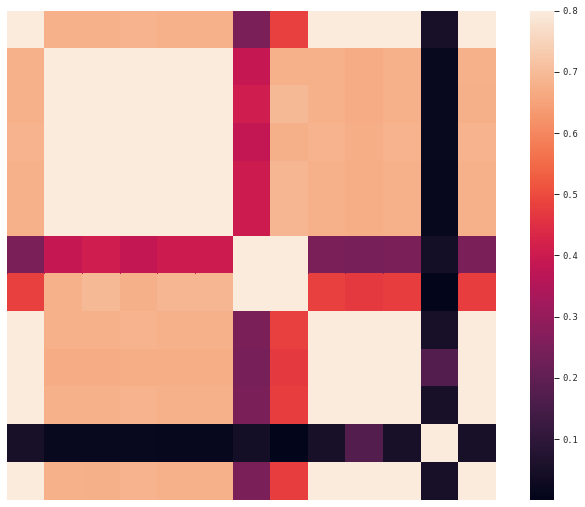

In [ ]:
# corrmat = data.drop([ "Total Trade Quantity"  ], axis=1).corr(method='pearson', min_periods=1000)
corrmat = data.corr(method='pearson', min_periods=1000)
# plot absolute values
corrmat = np.abs(corrmat)
sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, xticklabels = False, yticklabels = False)


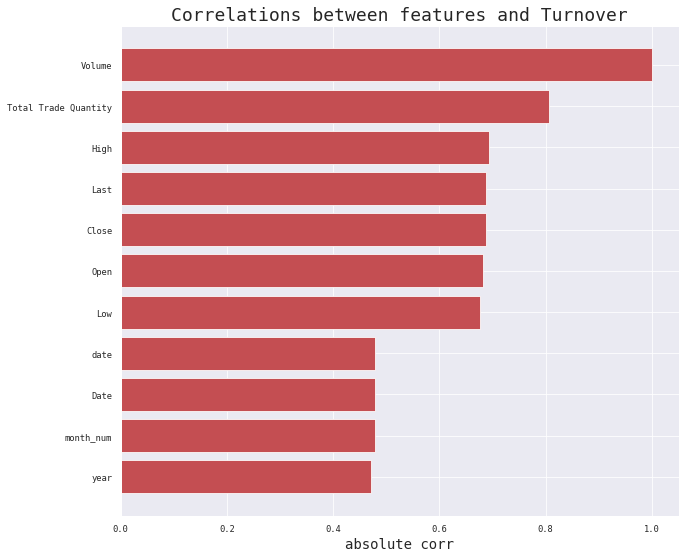

In [ ]:
remain_num = 50
corr_target = corrmat['Volume'].reset_index()[:-2]
corr_target.columns = ['feature','abs_corr']
corr_target = corr_target.sort_values(by = 'abs_corr', ascending = True)[:remain_num].loc[corr_target['abs_corr'] >0.01]
ind = np.arange(corr_target.shape[0])
width = 0.9


fig, ax = plt.subplots(figsize=(10,9))
rects = ax.barh(ind, corr_target.abs_corr.values, color='r')
ax.set_yticks(ind)
ax.set_yticklabels(corr_target.feature.values, rotation='horizontal')
ax.set_xlabel("absolute corr", fontsize = 14)
ax.set_title("Correlations between features and Turnover", fontsize = 18)
plt.show()

In [ ]:
corr_target_f = list(corr_target.feature.values)

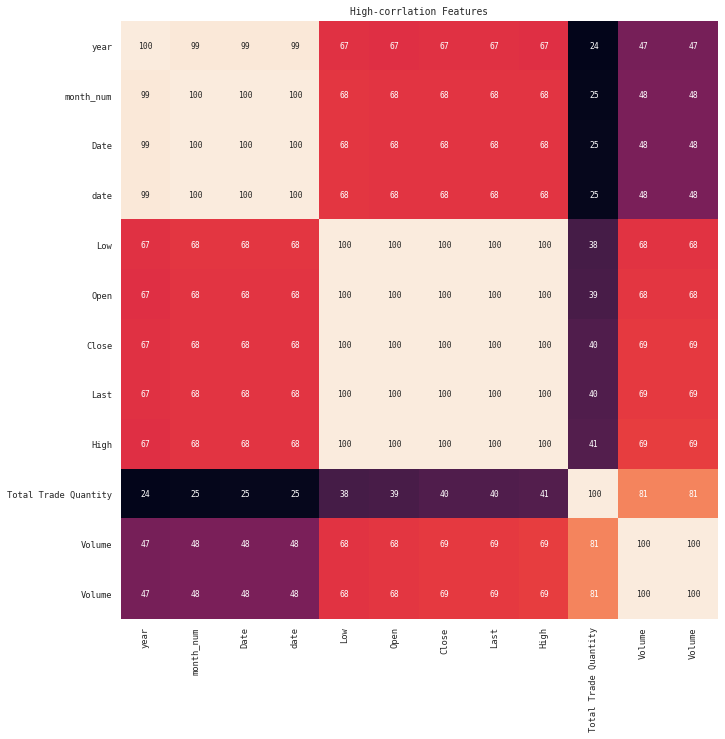

In [ ]:
corr_target_f2 = corr_target_f
corr_target_f2.append('Volume')
high_corr = data[corr_target_f2].corr(method='pearson', min_periods=1000)
high_corr = np.abs(high_corr)*100
f, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(high_corr, cbar=False, annot=True, square=True, fmt='.0f', 
            annot_kws={'size': 8})
plt.title('High-corrlation Features')
plt.show()


In [ ]:
remove_list = ['Total Trade Quantity']
corr_target_f = [x for x in corr_target_f if x not in remove_list]

In [ ]:

    train_y = data.Volume.values
    train_X = data.drop(["Date","Volume",'date','Total Trade Quantity'], axis=1)
    xgb_params = {
       'eta': 0.05,
       'max_depth': 10,
       'subsample': 1.0,
       'colsample_bytree': 0.7,
       'objective': 'reg:linear',
       'eval_metric': 'rmse',
       'silent': 1
    }
    dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
    model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)
    remain_num = 99

[11:25:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




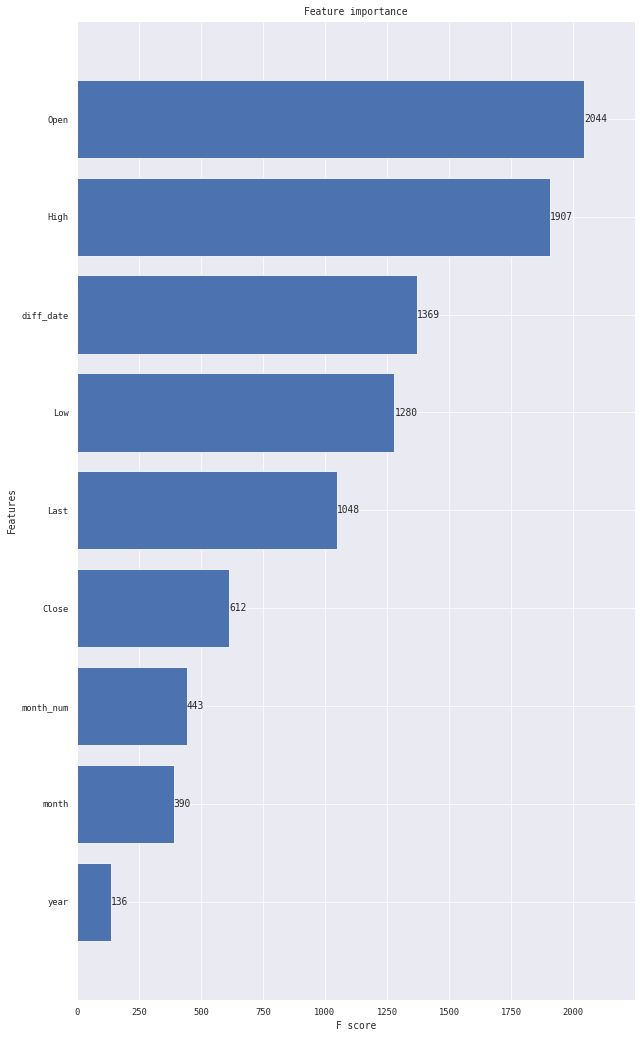

In [ ]:
fig, ax = plt.subplots(figsize=(10,18))
xgb.plot_importance(model, max_num_features=remain_num, height=0.8, ax=ax)
plt.show()

In [ ]:
importance = model.get_score(importance_type='weight')
tuples = sorted([(k, importance[k]) for k in importance], key=lambda x: x[1], reverse=True)[:remain_num]
xgb_imp_f = [x[0] for x in tuples]

In [ ]:
total_f = list(set(xgb_imp_f) | set(corr_target_f))
common_f = list(set(xgb_imp_f) & set(corr_target_f))
xgb_top_f = xgb_imp_f[:10]
corr_top_f = corr_target_f[:10]
print('there are {} features chosen in total'.format(len(total_f)))
print('there are {} features chosen in common'.format(len(common_f)))

there are 12 features chosen in total
there are 7 features chosen in common


In [ ]:
for f in xgb_top_f:
    print(f)

Open
High
diff_date
Low
Last
Close
month_num
month
year


In [ ]:
xgb_top_f

['Open',
 'High',
 'diff_date',
 'Low',
 'Last',
 'Close',
 'month_num',
 'month',
 'year']

In [ ]:
data1 = data[xgb_top_f]
data1=data1.iloc[:,:7]
data1.head()

,Open,High,diff_date,Low,Last,Close,month_num
0,233.00,236.45,2945,232.25,235.20,234.55,104
1,237.30,237.95,2942,231.10,233.65,233.55,104
2,236.65,239.85,2941,235.30,237.25,237.30,104
3,237.25,240.50,2940,235.05,236.35,236.35,104
4,241.00,241.55,2939,235.30,237.50,237.60,104


In [ ]:
data1.describe()

,Open,High,diff_date,Low,Last,Close,month_num
count,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000
mean,148.464564,150.722369,1469.505237,146.066858,148.228853,148.204888,55.425436
std,47.927187,48.663053,853.664622,47.210592,48.004391,47.983537,28.049163
min,81.100000,82.800000,0.000000,80.000000,81.000000,80.950000,7.000000
25%,120.000000,121.900000,728.000000,118.000000,119.800000,119.900000,31.000000
50%,141.000000,143.000000,1463.000000,139.050000,140.900000,140.900000,55.000000
75%,156.750000,158.500000,2210.000000,154.200000,156.300000,156.350000,80.000000
max,327.700000,328.750000,2945.000000,321.650000,325.950000,325.750000,104.000000


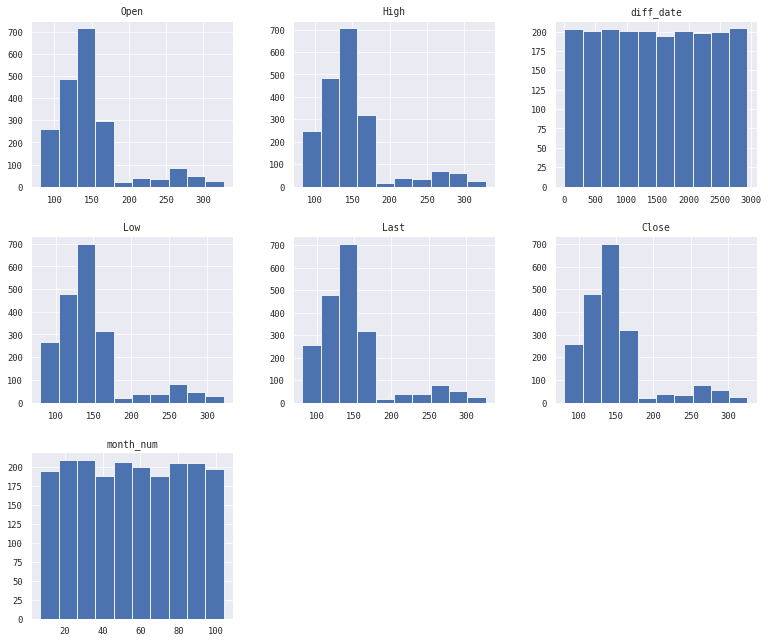

In [ ]:
#histogram
data1.hist(figsize=(13, 11))
plt.show()

In [ ]:
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range = (0, 1))
    data_scaled = sc.fit_transform(data1)
    print(data_scaled.shape)    

(2005, 7)


In [ ]:
    train_data = data_scaled[0:800]
    test_data = data_scaled[800:]

In [ ]:
def prepare_dataset(data, window_size):
    X, Y = np.empty((0,window_size)), np.empty((0))
    for i in range(len(data)-window_size-1):
        X = np.vstack([X,data[i:(i + window_size),0]])
        Y = np.append(Y,data[i + window_size,0])   
    X = np.reshape(X,(len(X),window_size,1))
    Y = np.reshape(Y,(len(Y),1))
    return X, Y

def train_evaluate(ga_individual_solution ):   
    # Decode GA solution to integer for window_size and num_units
    window_size_bits = BitArray(ga_individual_solution[0:6])
    num_units_bits = BitArray(ga_individual_solution[6:]) 
    window_size = window_size_bits.uint
    num_units = num_units_bits.uint
    print('\nWindow Size: ', window_size, ', Num of Units: ', num_units)
    
    # Return fitness score of 100 if window_size or num_unit is zero
    if window_size == 0 or num_units == 0:
        return 100, 
    
    # Segment the train_data based on new window_size; split into train and validation (80/20)
    X,Y = prepare_dataset(train_data,window_size)
    X_train, X_val, y_train, y_val = split(X, Y, test_size = 0.20, random_state = 1120)
    
    # Train LSTM model and predict on validation set
    inputs = Input(shape=(window_size,1))
    x = LSTM(num_units, input_shape=(window_size,1))(inputs)
    predictions = Dense(1, activation='linear')(x)
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(optimizer='adam',loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=5, batch_size=10,shuffle=True)
    y_pred = model.predict(X_val)
    
    # Calculate the RMSE score as fitness score for GA
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print('Validation RMSE: ', rmse,'\n')
    
    return rmse,

In [ ]:
    
    population_size = 4
    num_generations = 4
    gene_length = 10

    # As we are trying to minimize the RMSE score, that's why using -1.0. 
    # In case, when you want to maximize accuracy for instance, use 1.0
    creator.create('FitnessMax', base.Fitness, weights = (-1.0,))
    creator.create('Individual', list , fitness = creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register('binary', bernoulli.rvs, 0.5)
    toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.binary, n = gene_length)
    toolbox.register('population', tools.initRepeat, list , toolbox.individual)
    
    toolbox.register('mate', tools.cxOrdered)
    toolbox.register('mutate', tools.mutShuffleIndexes, indpb = 0.6)
    toolbox.register('select', tools.selRoulette)
    toolbox.register('evaluate', train_evaluate)
    
    population = toolbox.population(n = population_size)
    r = algorithms.eaSimple(population, toolbox, cxpb = 0.4, mutpb = 0.1, ngen = num_generations, verbose = False)


Window Size:  36 , Num of Units:  2
Epoch 1/5
61/61 [==============================] - 2s 10ms/step - loss: 0.0169
Epoch 2/5
61/61 [==============================] - 0s 6ms/step - loss: 0.0065
Epoch 3/5
61/61 [==============================] - 0s 7ms/step - loss: 0.0046
Epoch 4/5
61/61 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 5/5
61/61 [==============================] - 1s 8ms/step - loss: 0.0027
Validation RMSE:  0.050126696092709276 


Window Size:  56 , Num of Units:  8
Epoch 1/5
60/60 [==============================] - 3s 17ms/step - loss: 0.1205
Epoch 2/5
60/60 [==============================] - 1s 17ms/step - loss: 0.0113
Epoch 3/5
60/60 [==============================] - 1s 16ms/step - loss: 0.0017: 0s - loss: 0
Epoch 4/5
60/60 [==============================] - 4s 65ms/step - loss: 0.0013
Epoch 5/5
60/60 [==============================] - 4s 62ms/step - loss: 0.0014
Validation RMSE:  0.03944734172641323 


Window Size:  60 , Num of Units:  9
Epoch 1/

In [ ]:
   
    best_individuals = tools.selBest(population,k = 1)
    best_window_size = None
    best_num_units = None
    
    for bi in best_individuals:
        window_size_bits = BitArray(bi[0:6])
        num_units_bits = BitArray(bi[6:]) 
        best_window_size = window_size_bits.uint
        best_num_units = num_units_bits.uint
        print('\nWindow Size: ', best_window_size, ', Num of Units: ', best_num_units)


Window Size:  49 , Num of Units:  9


In [ ]:
    X_train,y_train = prepare_dataset(train_data,best_window_size)
    X_test, y_test = prepare_dataset(test_data,best_window_size)
    inputs = Input(shape=(best_window_size,1))
    x = LSTM(best_num_units, input_shape=(best_window_size,1))(inputs)
    predictions = Dense(1, activation='linear')(x)
    model = Model(inputs = inputs, outputs = predictions)
    model.compile(optimizer='adam',loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=5, batch_size=10,shuffle=True)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('Test RMSE: ', rmse)

Epoch 1/5
75/75 [==============================] - 3s 16ms/step - loss: 0.1194
Epoch 2/5
75/75 [==============================] - 1s 14ms/step - loss: 0.0082
Epoch 3/5
75/75 [==============================] - 1s 10ms/step - loss: 0.0015
Epoch 4/5
75/75 [==============================] - 1s 8ms/step - loss: 0.0011
Epoch 5/5
75/75 [==============================] - 1s 8ms/step - loss: 9.3029e-04
Test RMSE:  0.03233899663316181


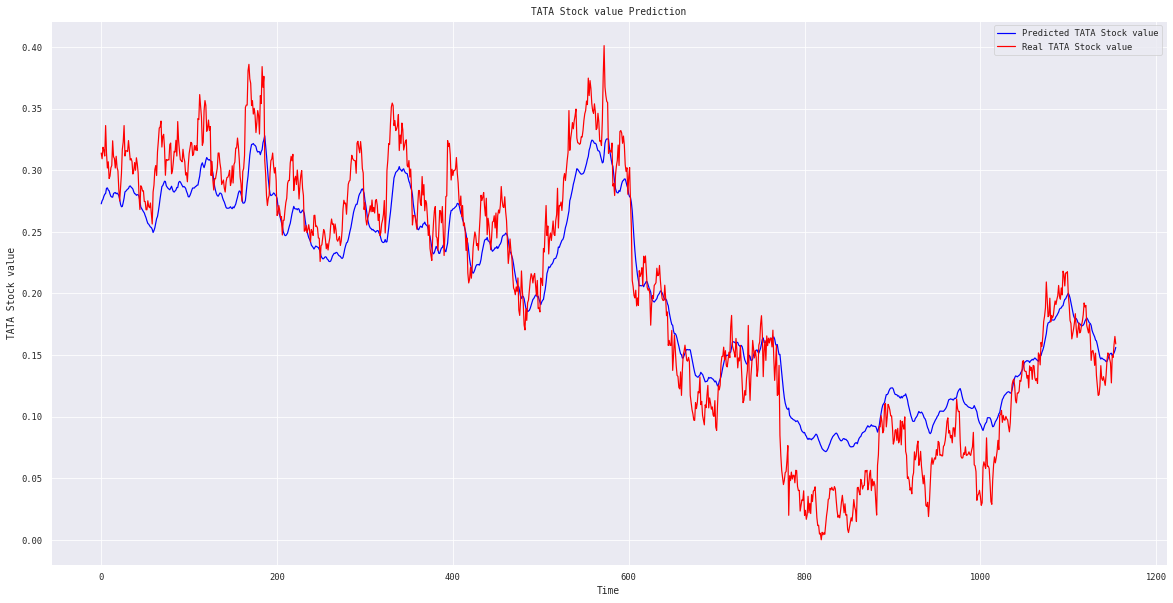

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(y_pred, color = 'blue', label = 'Predicted TATA Stock value')
plt.plot(y_test, color = 'red', label = 'Real TATA Stock value')
plt.title('TATA Stock value Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock value')
plt.legend()
plt.show()

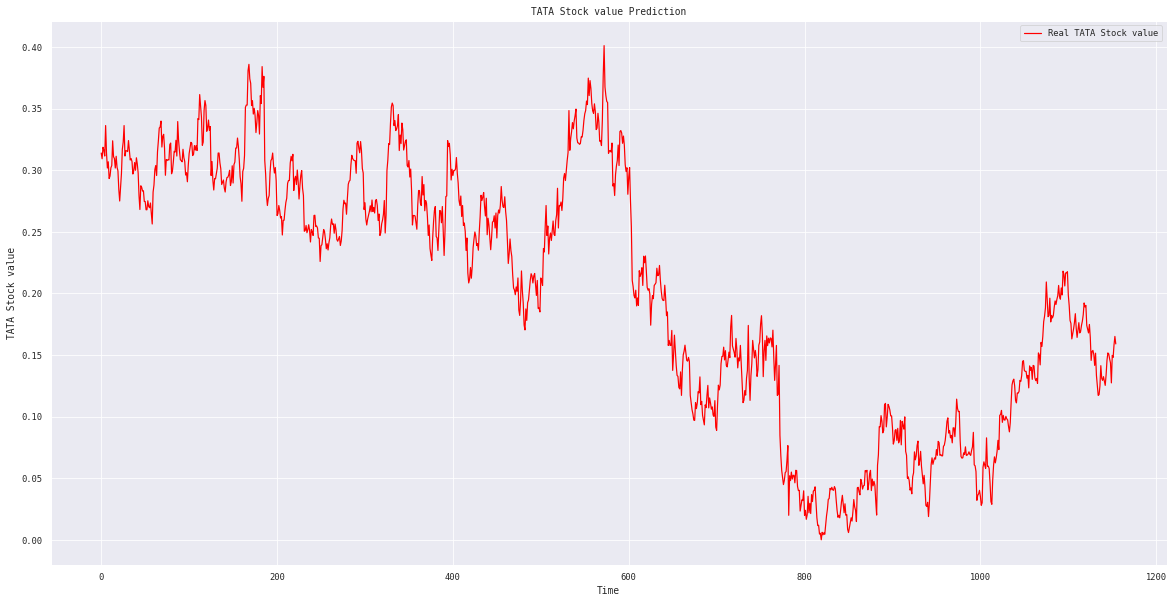

In [ ]:
# Visualising the results
plt.figure(figsize=(20, 10))
plt.plot(y_test, color = 'red', label = 'Real TATA Stock value')
plt.title('TATA Stock value Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock value')

plt.legend()
plt.show()

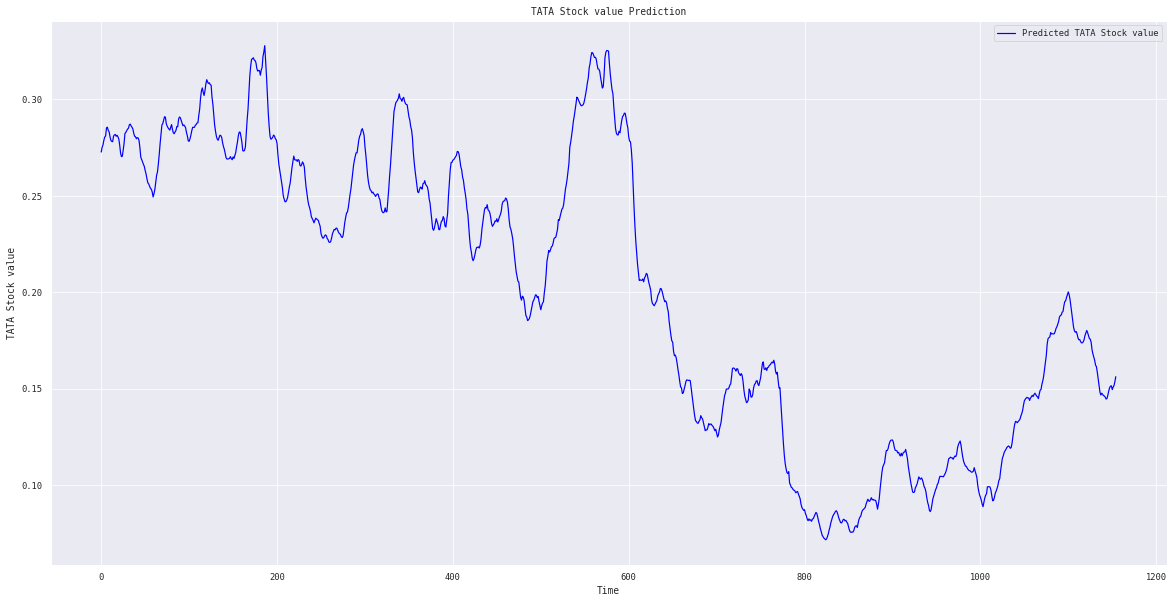

In [ ]:
# Visualising the results
plt.figure(figsize=(20, 10))
plt.plot(y_pred, color = 'blue', label = 'Predicted TATA Stock value')
plt.title('TATA Stock value Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock value')
plt.legend()
plt.show()

In [ ]:
a=y_pred[:,0]
lenth=len(test_data)
alength=len(a)
test_data[:,0].shape

(1205,)

In [ ]:
x_input=test_data[:,0][lenth-best_window_size:].reshape(1,-1)
x_input.shape

(1, 49)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next days
from numpy import array

lst_output=[]
n_steps=best_window_size
i=0
while(i<30):
    
    if(len(temp_input)>best_window_size):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[0.15938814]
50
1 day input [0.18349554 0.1717356  0.16423358 0.16991079 0.17619627 0.16788321
 0.16909976 0.17396594 0.17741281 0.18268451 0.19221411 0.18896999
 0.19018654 0.17396594 0.17092457 0.16788321 0.17477697 0.16443633
 0.14557989 0.15287916 0.15369019 0.15044607 0.14152474 0.15145985
 0.13341444 0.12530414 0.11719384 0.11780211 0.12489862 0.14132198
 0.13098135 0.12935929 0.13240065 0.12895377 0.12530414 0.13381995
 0.14557989 0.15166261 0.15085158 0.14679643 0.14355231 0.12733171
 0.14963504 0.14801298 0.15815085 0.16504461 0.15896188 0.16626115
 0.15938814]
1 day output [[0.16008207]]
2 day input [0.1717356  0.16423358 0.16991079 0.17619627 0.16788321 0.16909976
 0.17396594 0.17741281 0.18268451 0.19221411 0.18896999 0.19018654
 0.17396594 0.17092457 0.16788321 0.17477697 0.16443633 0.14557989
 0.15287916 0.15369019 0.15044607 0.14152474 0.15145985 0.13341444
 0.12530414 0.11719384 0.11780211 0.12489862 0.14132198 0.13098135
 0.12935929 0.13240065 0.12895377 0.12530414 0.1

14 day output [[0.1663951]]
15 day input [0.17092457 0.16788321 0.17477697 0.16443633 0.14557989 0.15287916
 0.15369019 0.15044607 0.14152474 0.15145985 0.13341444 0.12530414
 0.11719384 0.11780211 0.12489862 0.14132198 0.13098135 0.12935929
 0.13240065 0.12895377 0.12530414 0.13381995 0.14557989 0.15166261
 0.15085158 0.14679643 0.14355231 0.12733171 0.14963504 0.14801298
 0.15815085 0.16504461 0.15896188 0.16626115 0.15938814 0.16008207
 0.16071983 0.16131935 0.16188827 0.16243175 0.16295263 0.16345222
 0.16393134 0.16439041 0.1648297  0.16524945 0.16565004 0.16603173
 0.1663951 ]
15 day output [[0.16674049]]
16 day input [0.16788321 0.17477697 0.16443633 0.14557989 0.15287916 0.15369019
 0.15044607 0.14152474 0.15145985 0.13341444 0.12530414 0.11719384
 0.11780211 0.12489862 0.14132198 0.13098135 0.12935929 0.13240065
 0.12895377 0.12530414 0.13381995 0.14557989 0.15166261 0.15085158
 0.14679643 0.14355231 0.12733171 0.14963504 0.14801298 0.15815085
 0.16504461 0.15896188 0.16626115

29 day output [[0.17007622]]
[[0.15938813984394073], [0.16008207201957703], [0.1607198268175125], [0.16131934523582458], [0.1618882715702057], [0.1624317467212677], [0.16295263171195984], [0.16345222294330597], [0.16393133997917175], [0.1643904149532318], [0.16482970118522644], [0.16524945199489594], [0.16565003991127014], [0.16603173315525055], [0.16639509797096252], [0.16674049198627472], [0.16706867516040802], [0.16738030314445496], [0.1676761507987976], [0.16795676946640015], [0.1682228446006775], [0.16847524046897888], [0.16871461272239685], [0.16894157230854034], [0.1691567450761795], [0.16936081647872925], [0.16955424845218658], [0.16973762214183807], [0.16991141438484192], [0.17007622122764587]]


In [ ]:
day_new=np.arange(0,best_window_size)
day_pred=np.arange(best_window_size,best_window_size+30)

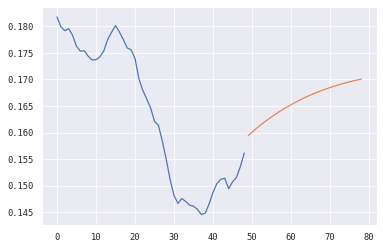

In [ ]:
plt.plot(day_new,a[alength-best_window_size:])
plt.plot(day_pred,lst_output)

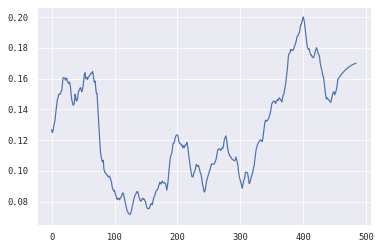

In [ ]:
df3=y_pred.tolist()
df3.extend(lst_output)
plt.plot(df3[700:])


In [ ]:
lst_output = np.array(lst_output)
old_pred=y_pred


In [ ]:
import skfuzzy as fuzz
stock_value=y_pred[:,0]


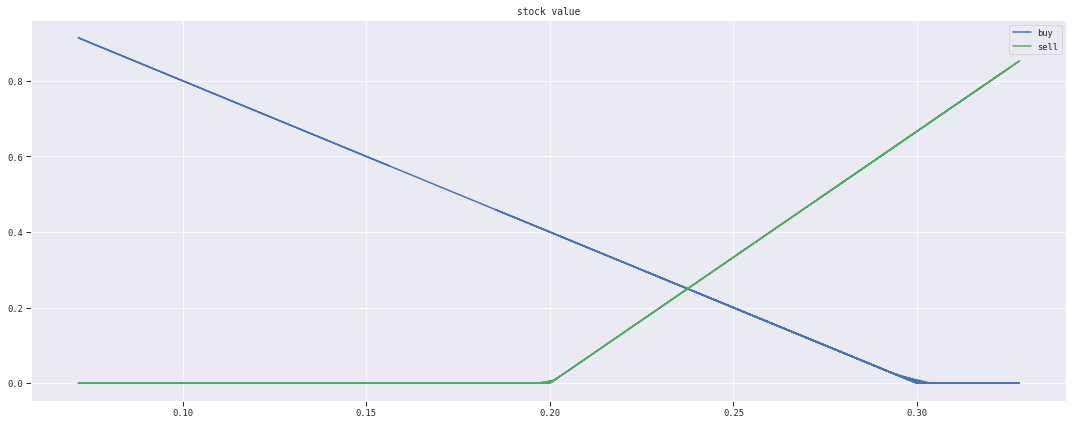

In [ ]:
    buy = fuzz.trimf(stock_value, [0, 0.05, .30])
    sell = fuzz.trimf(stock_value, [0.20, .35,.40])
    fig, ax = plt.subplots(nrows=1, figsize=(15, 6))
    ax.plot(stock_value, buy, 'b', linewidth=1.5, label = 'buy')
    ax.plot(stock_value, sell, 'g', linewidth=1.5, label = 'sell')
    ax.legend()
    ax.set_title('stock value')
    
    # for ax in (ax0):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    plt.tight_layout()

In [ ]:
    x=0.5
    buyStockdf=pd.DataFrame([[0,0]],columns = ["stock_value","buying_recommendation"])
    
    for y in np.arange(1,51,1):
        x=x+0.01
        buy_stock=fuzz.interp_universe(stock_value,buy,x)
    
        buyStockdf.loc[len(buyStockdf.index)] = [buy_stock,x] 
        buyStockdf.style.set_properties(subset=['stock_value'], **{'width-min': '300px'})
        


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
buyStockdf.style.set_properties(subset=['stock_value'], **{'width-min': '300px'})

,stock_value,buying_recommendation
0,0,0.000000
1,[0.17250001192092895],0.510000
2,[0.17000001192092895],0.520000
3,[0.16750001192092895],0.530000
4,[0.16500001192092895],0.540000
5,[0.16250001192092894],0.550000
6,[0.16000001192092894],0.560000
7,[0.15750001192092894],0.570000
8,[0.15500001192092894],0.580000
9,[0.15250001192092894],0.590000


In [ ]:
    z=.5
    sellStockdf=pd.DataFrame([[0,0]],columns = ["stock_value","sellng_recommendation"])
    for a in np.arange(1,51,1):
        z=z+0.01
        sell_stock=fuzz.interp_universe(stock_value,sell,z)
        sellStockdf.loc[len(sellStockdf.index)] = [sell_stock,z]  

In [ ]:
sellStockdf.style.set_properties(subset=['stock_value'], **{'width-min': '300px'})

,stock_value,sellng_recommendation
0,0,0.000000
1,"[0.2765000059604645, 0.27650000636308597, 0.27650000870986696, 0.2765000084238401, 0.27650000860697926, 0.2765000073231262, 0.2765000047224636, 0.2765000076158666, 0.276500008518257, 0.2765000084975219, 0.2765000043269179, 0.2765000089406967, 0.276500003982362, 0.27650000436648875, 0.2765000059192912]",0.510000
2,"[0.2780000059604645, 0.2780000073092165, 0.27800000811780234, 0.2780000089406967, 0.2780000078872027, 0.2780000080859895, 0.27800000300443123, 0.27800000874527125, 0.2780000079162514, 0.278000007070357, 0.27800000298023225, 0.2780000037722672]",0.520000
3,"[0.2795000072769742, 0.27950000421143395, 0.2795000089406967, 0.2795000059634772, 0.2795000061057218, 0.279500005183898, 0.27950000603044767, 0.2795000064342836, 0.27950000320351204, 0.2795000082830048, 0.27950000731424574, 0.2795000047315243, 0.27950000476289133, 0.279500007159163, 0.27950000571588385, 0.27950000621212867, 0.27950000298023225, 0.27950000317804563, 0.2795000044719336, 0.2795000059604645]",0.530000
4,"[0.281000003699175, 0.28100000323340424, 0.2810000059604645, 0.28100000683381526, 0.2810000064178306, 0.2810000089406967, 0.28100000870831043, 0.2810000041736926, 0.28100000298023226, 0.28100000335279984, 0.28100000882505155, 0.2810000074844405, 0.2810000058844155, 0.281000008244647, 0.28100000842733647, 0.2810000088795458, 0.28100000548308773, 0.28100000702200273, 0.2810000047609422, 0.28100000600836217, 0.2810000067122401]",0.540000
5,"[0.28250000399368713, 0.282500008163013, 0.2825000059604645, 0.28250000801933683, 0.28250000331979275, 0.28250000710144024, 0.28250000298023226, 0.2825000043097553, 0.28250000677562875, 0.2825000048633738, 0.2825000050263071, 0.28250000527614333, 0.28250000663378977, 0.2825000089406967, 0.28250000352864196, 0.2825000060585739, 0.2825000063436245, 0.28250000611023446, 0.28250000639325457, 0.2825000058867796]",0.550000
6,"[0.2840000050637025, 0.28400000318989715, 0.28400000427032157, 0.2840000059604645, 0.28400000669063985, 0.2840000089406967, 0.2840000032864402, 0.28400000298023226, 0.2840000064018612, 0.28400000792441127, 0.28400000404737435, 0.28400000715933876, 0.28400000454186214, 0.28400000416819876, 0.2840000044104081, 0.2840000038077031, 0.2840000054580044, 0.2840000072592174]",0.560000
7,"[0.2855000059604645, 0.28550000310063917, 0.28550000522085034, 0.2855000074982152, 0.2855000058535379, 0.28550000513520957, 0.28550000311847595, 0.2855000089406967, 0.28550000767132816, 0.28550000298023226, 0.2855000075568484, 0.2855000036144989, 0.2855000085206498, 0.28550000331009046, 0.2855000047891412, 0.2855000078846451, 0.2855000051587257]",0.570000
8,"[0.28700000298023226, 0.2870000035301489, 0.28700000467438824, 0.28700000860711816, 0.2870000080261169, 0.2870000031513443, 0.287000004120278, 0.2870000085100727, 0.2870000079903492, 0.28700000512521895, 0.28700000686973764]",0.580000
9,"[0.2885000047505191, 0.28850000298023226, 0.2885000068916535, 0.2885000050136827, 0.28850000395728503, 0.2885000034514148, 0.28850000869317677, 0.2885000066511125, 0.288500006635939, 0.2885000038745958]",0.590000


In [ ]:
future_data=pd.read_csv("D://internship work//main work//stock prediction//ftest.csv")
old_data=data
data=future_data


In [ ]:
    data['date'] = data['Date'].apply(trans_date)
    data['year'] = data.date.apply(lambda x: x.year)
    data['month_num'] = data.date.apply(lambda x: x.month + 12*(x.year-2010))
    data['month'] = data.date.apply(lambda x: x.month)
    start_date = data.date.min()
    data['diff_date'] = data['date'].apply(lambda x: (x - start_date).days)
    data['Volume'] = num2log(data.Volume.values)
    month_num_count = data.groupby('month_num').count().reset_index()
    month_num_count = data.groupby('month_num').size().reset_index()
    month_num_count.columns = ['month_num', 'Count']
    date_count = data.groupby('date').count().reset_index()
    date_count = data.groupby('date').size().reset_index()
    date_count.columns = ['date', 'Count']

In [ ]:
    corrmat = data.corr(method='pearson', min_periods=1000)
    # plot absolute values
    corrmat = np.abs(corrmat)
    sns.set(context="paper", font="monospace")
    
    remain_num = 50
    corr_target = corrmat['Volume'].reset_index()[:-2]
    corr_target.columns = ['feature','abs_corr']
    corr_target = corr_target.sort_values(by = 'abs_corr', ascending = True)[:remain_num].loc[corr_target['abs_corr'] >0.01]
    ind = np.arange(corr_target.shape[0])
    width = 0.9
    
    corr_target_f = list(corr_target.feature.values)
    
    corr_target_f2 = corr_target_f
    corr_target_f2.append('Volume')
    high_corr = data[corr_target_f2].corr(method='pearson', min_periods=1000)
    high_corr = np.abs(high_corr)*100
    
    remove_list = ['Total Trade Quantity']
    corr_target_f = [x for x in corr_target_f if x not in remove_list]

In [ ]:
    train_y = data.Volume.values
    train_X = data.drop(["Date",'date','Volume','Total Trade Quantity'], axis=1)
    xgb_params = {
       'eta': 0.05,
       'max_depth': 10,
       'subsample': 1.0,
       'colsample_bytree': 0.7,
       'objective': 'reg:linear',
       'eval_metric': 'rmse',
       'silent': 1
    }
    dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
    model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)
    remain_num = 99
    
    importance = model.get_score(importance_type='weight')
    tuples = sorted([(k, importance[k]) for k in importance], key=lambda x: x[1], reverse=True)[:remain_num]
    xgb_imp_f = [x[0] for x in tuples]
    
    total_f = list(set(xgb_imp_f) | set(corr_target_f))
    common_f = list(set(xgb_imp_f) & set(corr_target_f))
    xgb_top_f = xgb_imp_f[:10]
    corr_top_f = corr_target_f[:10]

[11:26:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:26:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [ ]:
    data1 = data[xgb_top_f]
    data1=data1.iloc[:,:7]

In [ ]:
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range = (0, 1))
    data_scaled = sc.fit_transform(data1)

In [ ]:
    datalength = len(data.index)
#     train_data1 = data_scaled[0:datalength/2]
    test_data = data_scaled[0:datalength]

In [ ]:
    population_size = 4
    num_generations = 4
    gene_length = 10

    # As we are trying to minimize the RMSE score, that's why using -1.0. 
    # In case, when you want to maximize accuracy for instance, use 1.0
    creator.create('FitnessMax', base.Fitness, weights = (-1.0,))
    creator.create('Individual', list , fitness = creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register('binary', bernoulli.rvs, 0.5)
    toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.binary, n = gene_length)
    toolbox.register('population', tools.initRepeat, list , toolbox.individual)
    
    toolbox.register('mate', tools.cxOrdered)
    toolbox.register('mutate', tools.mutShuffleIndexes, indpb = 0.6)
    toolbox.register('select', tools.selRoulette)
    toolbox.register('evaluate', train_evaluate)
    
    population = toolbox.population(n = population_size)
    r = algorithms.eaSimple(population, toolbox, cxpb = 0.4, mutpb = 0.1, ngen = num_generations, verbose = False)


Window Size:  34 , Num of Units:  9


C:\ProgramData\Anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\ProgramData\Anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Epoch 1/5
62/62 [==============================] - 3s 19ms/step - loss: 0.0643
Epoch 2/5
62/62 [==============================] - 1s 19ms/step - loss: 0.0037
Epoch 3/5
62/62 [==============================] - 1s 17ms/step - loss: 0.0013
Epoch 4/5
62/62 [==============================] - 1s 15ms/step - loss: 0.0015
Epoch 5/5
62/62 [==============================] - 1s 14ms/step - loss: 0.0013
Validation RMSE:  0.036524032064869094 


Window Size:  28 , Num of Units:  2
Epoch 1/5
62/62 [==============================] - 3s 16ms/step - loss: 0.0982
Epoch 2/5
62/62 [==============================] - 1s 17ms/step - loss: 0.0531
Epoch 3/5
62/62 [==============================] - 1s 17ms/step - loss: 0.0326
Epoch 4/5
62/62 [==============================] - 1s 15ms/step - loss: 0.0147
Epoch 5/5
62/62 [==============================] - 1s 15ms/step - loss: 0.0099
Validation RMSE:  0.09906711682656605 


Window Size:  14 , Num of Units:  8
Epoch 1/5
63/63 [==============================] - 3s 9

In [ ]:
    best_individuals = tools.selBest(population,k = 1)
    best_window_size = None
    best_num_units = None
    
    for bi in best_individuals:
        window_size_bits = BitArray(bi[0:6])
        num_units_bits = BitArray(bi[6:]) 
        best_window_size = window_size_bits.uint
        best_num_units = num_units_bits.uint        
        print('\nWindow Size: ', best_window_size, ', Num of Units: ', best_num_units)    


Window Size:  60 , Num of Units:  2


In [ ]:
    X_train,y_train = prepare_dataset(lst_output,best_window_size)
    X_test, y_test = prepare_dataset(test_data,best_window_size)
    inputs = Input(shape=(best_window_size,1))
    x = LSTM(best_num_units, input_shape=(best_window_size,1))(inputs)
    predictions = Dense(1, activation='linear')(x)
    model = Model(inputs = inputs, outputs = predictions)
    model.compile(optimizer='adam',loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=5, batch_size=10,shuffle=True)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('Test RMSE: ', rmse)

Epoch 1/5


ValueError: Expect x to be a non-empty array or dataset.

In [ ]:
    plt.figure(figsize=(20, 10))
    plt.plot(y_pred, color = 'blue', label = 'Predicted TATA Stock value')
    plt.plot(y_test, color = 'red', label = 'Real TATA Stock value')
    plt.title('TATA Stock value Prediction')
    plt.xlabel('Time')
    plt.ylabel('TATA Stock value')
    plt.legend()
    plt.show()

In [ ]:
y_pred,y_test


In [ ]:
data=old_data.append(data, ignore_index = True)
data.to_csv('updated_data.csv');

In [ ]:
prediction=np.concatenate((old_pred, y_pred), axis=None)

In [ ]:
np.savetxt("predictedweights.csv", prediction, delimiter=",")
np.savetxt("lst_output.csv", lst_output, delimiter=",")

In [ ]:
# prediction.to_csv('predictedweights.csv');
# lst_output.to_csv('lst_output.csv');

In [ ]:
# x_qual = np.arange(0, 11, 1)
# qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
# print(type(x_qual),type(qual_lo))
# fig, ax = plt.subplots(nrows=1, figsize=(8, 9))
# ax.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='buy')

In [ ]:
# data = pd.read_csv("D://internship work//main work//stock prediction//RELIANCE.NS.csv")
# datat = pd.read_csv("D://internship work//main work//stock prediction//RELIANCE.BO.csv")
# data=data.append(datat, ignore_index = True)
# datalength = len(data.index)
# data.tail()


In [ ]:
# data = pd.read_csv("D://internship work//main work//stock prediction//Tatatrain.csv")
# test_data1 = pd.read_csv("D://internship work//main work//stock prediction//TATAtest.csv")
# datalength = len(data.index)
# datatlength =len(datat.index)
# data=data.append(Test_data, ignore_index = True)
# data=data.dropna()
# data.to_csv('datadf.csv');
# # train_data = data_scaled[0:1200]
# # test_data = data_scaled[1200:]
# model_pipeline = Pipeline(steps=[('timeAnalysis',timeAnalysis()),
#                                  ('correlation',correlation()),
#                                  ('selecting important features', feature_importance()),
#                                  ('feautre reduction',feautre_reduction()),
#                                  ('feaure_scaling',feaure_scaling()),
#                                  ('trianing',trianing()),
#                                  ('genetic_alg', genetic_alg()),
#                                  ('lstm',lstm()),
#                                  ('model',model1()),
#                                  ('visualise',visualise()), 
#                                  ('fuzzy',fuzzy()),
#                                  ('fuzzyBuy',fuzzyBuy()),('fuzzySell',fuzzySell())])
                                 
                                 


In [ ]:
# fit the pipeline with the training data
model_pipeline.fit(X_train,y_train)

In [ ]:
buyStockRes = pd.read_csv('buyStockResult.csv')
buyStockRes.style.set_properties(subset=['stock_value'], **{'width-min': '300px'})

In [ ]:
sellStockRes = pd.read_csv('sellStockResult.csv')
sellStockRes.style.set_properties(subset=['stock_value'], **{'width-min': '300px'})